# COMP90051 Workshop 2
## Part A: Linear regression

***

Our aim for this part of the workshop is to fit a linear model from scratch—relying only on the `numpy` library. We'll experiment with two implementations: one based on iterative updates (coordinate descent) and another based on linear algebra. Finally, to check the correctness of our implementation, we'll compare its output to the output of `sklearn`.

Firstly we will import the relevant libraries (`numpy`, `matplotlib`, etc.).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import io


Bad key "ckend" on line 1 in
/Users/Nathan/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


To check what a command does simply type `object?`. For example:

In [2]:
np.arange?

### 1. Review
In lectures, we saw that a linear model can be expressed as:
$$y = w_0 + \sum_{j = 1}^{m} w_j x_j = \mathbf{w} \cdot \mathbf{x} $$
where 

* $y$ is the *target variable*;
* $\mathbf{x} = [x_1, \ldots, x_m]$ is a vector of *features* (we define $x_0 = 1$); and
* $\mathbf{w} = [w_0, \ldots, w_m]$ are the *weights*.

To fit the model, we *minimise* the empirical risk with respect to $\vec{w}$. In this simplest case (square loss), this amounts to minimising the sum of squared residuals:

$$SSR(\mathbf{w}) = \sum_{i=1}^{n}(y_i - \mathbf{w} \cdot \mathbf{x}_i)^2$$

**Note:** For simplicity, we'll consider the case $m = 1$ (i.e. only one feature excluding the intercept).

### 2. Data set
We'll be working with some data from the Olympics—the gold medal race times for marathon winners from 1896 to 2012. The code block below reads the data into a numpy array of floats, and prints the result.

In [3]:
# CSV file with variables YEAR,TIME
csv = """1896,4.47083333333333
1900,4.46472925981123
1904,5.22208333333333
1908,4.1546786744085
1912,3.90331674958541
1920,3.5695126705653
1924,3.8245447722874
1928,3.62483706600308
1932,3.59284275388079
1936,3.53880791562981
1948,3.6701030927835
1952,3.39029110874116
1956,3.43642611683849
1960,3.2058300746534
1964,3.13275664573212
1968,3.32819844373346
1972,3.13583757949204
1976,3.07895880238575
1980,3.10581822490816
1984,3.06552909112454
1988,3.09357348817
1992,3.16111703598373
1996,3.14255243512264
2000,3.08527866650867
2004,3.1026582928467
2008,2.99877552632618
2012,3.03392977050993"""

# Read into a numpy array (as floats)
olympics = np.genfromtxt(io.BytesIO(csv.encode()), delimiter=",")
print(olympics)

[[1896.            4.47083333]
 [1900.            4.46472926]
 [1904.            5.22208333]
 [1908.            4.15467867]
 [1912.            3.90331675]
 [1920.            3.56951267]
 [1924.            3.82454477]
 [1928.            3.62483707]
 [1932.            3.59284275]
 [1936.            3.53880792]
 [1948.            3.67010309]
 [1952.            3.39029111]
 [1956.            3.43642612]
 [1960.            3.20583007]
 [1964.            3.13275665]
 [1968.            3.32819844]
 [1972.            3.13583758]
 [1976.            3.0789588 ]
 [1980.            3.10581822]
 [1984.            3.06552909]
 [1988.            3.09357349]
 [1992.            3.16111704]
 [1996.            3.14255244]
 [2000.            3.08527867]
 [2004.            3.10265829]
 [2008.            2.99877553]
 [2012.            3.03392977]]


We'll take the race time as the *target variable* $y$ and the year of the race as the only non-trivial *feature* $x = x_1$.

In [4]:
x = olympics[:, 0:1]
y = olympics[:, 1:2]

Plotting $y$ vs $x$, we see that a linear model could be a decent fit for this data.

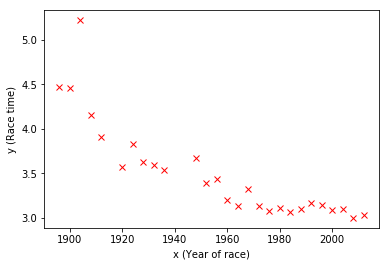

In [5]:
plt.plot(x, y, 'rx')
plt.ylabel("y (Race time)")
plt.xlabel("x (Year of race)")
plt.show()

### 3. Iterative solution (coordinate descent)

Expanding out the sum of square residuals for this simple case (where $\mathbf{w}=[w_0, w_1]$) we have:
$$SSR(w_0, w_1) = \sum_{i=1}^{n}(y_i - w_0 - w_1 x_i)^2$$
Let's start with an initial guess for the slope $w_1$ (which is clearly negative from the plot).

In [14]:
w1 = -0.4
print (y.shape)

(27, 1)


Then using the maximum likelihood update, we get the following estimate for the intercept $w_0$:
$$w_0 = \frac{\sum_{i=1}^{n}(y_i-w_1 x_i)}{n}$$

In [22]:
def update_w0(x, y, w1):
    return np.sum(y-w1*x) / y.shape[0]

w0 = update_w0(x, y, w1)
print(w0)

786.0197711453593


Similarly, we can update $w_1$ based on this new estimate of $w_0$:
$$w_1 = \frac{\sum_{i=1}^{n} (y_i - w_0) \times x_i}{\sum_{i=1}^{n} x_i^2}$$

In [23]:
def update_w1(x, y, w0):
    return np.sum((y-w0)*x) / np.sum(np.power(x,2))

w1 = update_w1(x, y, w0)
print(w1)

-0.3998724072997095


Let's examine the quality of fit for these values for the weights $w_0$ and $w_1$. We create a vector of "test" values `x_test` and a function to compute the predictions according to the model.

In [24]:
x_test = np.arange(1890, 2020)[:, None]

def predict(x_test, w0, w1): 
    return w0 + x_test*w1

Now plot the test predictions with a blue line on the same plot as the data.

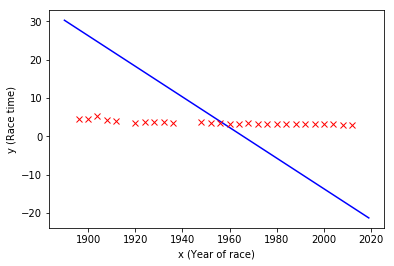

In [25]:
def plot_fit(x_test, y_test, x, y): 
    plt.plot(x_test, y_test, 'b-')
    plt.plot(x, y, 'rx')
    plt.ylabel("y (Race time)")
    plt.xlabel("x (Year of race)")
    plt.show()

plot_fit(x_test, predict(x_test, w0, w1), x, y)

We'll compute the sum of square residuals $SSR(w_0,w_1)$ on the training set to measure the goodness of fit.

In [28]:
def compute_SSR(x, y, w0, w1): 
    return np.sum(np.power(y-(w0+x*w1),2))

print(compute_SSR(x, y, w0, w1))

5104.58016310321


It's obvious from the plot that the fit isn't very good. 
We must repeat the alternating parameter updates many times before the algorithm converges to the optimal weights.

In [29]:
for i in np.arange(10000):
    w1 = update_w1(x, y, w0) 
    w0 = update_w0(x, y, w1) 
    if i % 500 == 0:
        print("Iteration #{}: SSR = {}".format(i, compute_SSR(x, y, w0, w1)))
print("Final estimates: w0 = {}; w1 = {}".format(w0, w1))

Iteration #0: SSR = 5102.897935763432
Iteration #500: SSR = 3670.1237324135973
Iteration #1000: SSR = 2639.795115741395
Iteration #1500: SSR = 1898.8709311408238
Iteration #2000: SSR = 1366.0616521953525
Iteration #2500: SSR = 982.91080676378
Iteration #3000: SSR = 707.3815017083587
Iteration #3500: SSR = 509.2444002260096
Iteration #4000: SSR = 366.7611497567821
Iteration #4500: SSR = 264.2993871066079
Iteration #5000: SSR = 190.61765419549567
Iteration #5500: SSR = 137.63205620885944
Iteration #6000: SSR = 99.52934766658794
Iteration #6500: SSR = 72.12913980966424
Iteration #7000: SSR = 52.42525472313147
Iteration #7500: SSR = 38.25590646378112
Iteration #8000: SSR = 28.066523547010355
Iteration #8500: SSR = 20.739191172631
Iteration #9000: SSR = 15.470000666868613
Iteration #9500: SSR = 11.680849695214263
Final estimates: w0 = 56.89456037769841; w1 = -0.027293057729518334


Let's try plotting the result again.

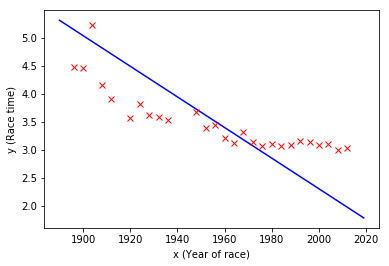

In [30]:
plot_fit(x_test, predict(x_test, w0, w1), x, y)

Does more than 10 iterations considerably improve fit in this case?

### 4. Linear algebra solution

In lectures, we saw that it's possible to solve for the optimal weights $\mathbf{w}^\star$ analytically. The solution is
$$\mathbf{w}^* = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}$$
where
$$\mathbf{X} = \begin{pmatrix} 
        1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n 
    \end{pmatrix} 
  \quad \text{and} \quad 
  \mathbf{y} = \begin{pmatrix} 
          y_1 \\ y_2 \\ \vdots \\ y_n
      \end{pmatrix}
$$

We construct $\mathbf{X}$ in the code block below, remembering to include the $x_0 = 1$ column for the bias (intercept).

In [45]:
X = np.hstack((np.ones_like(x), x))
print (np.linalg.inv(np.matmul(X.T,X)))

[[ 1.12342243e+02 -5.74070532e-02]
 [-5.74070532e-02  2.93447640e-05]]


Although we can express $\mathbf{w}^\star$ explicitly in terms of the matrix inverse $(\mathbf{X}^\top \mathbf{X})^{-1}$, this isn't an efficient way to compute $\mathbf{w}$ numerically. It is better instead to solve the following system of linear equations:
$$\mathbf{X}^\top\mathbf{X} \mathbf{w}^\star = \mathbf{X}^\top\mathbf{y}$$

This can be done in numpy using the command

In [39]:
np.linalg.solve?

which gives

In [50]:
w = np.linalg.solve((np.matmul(X.T,X)),np.dot(X.T,y))
print(w)

[[ 2.88952457e+01]
 [-1.29806477e-02]]


Plotting this solution, as before:

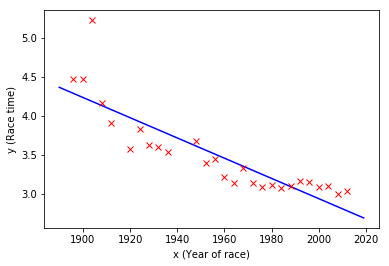

In [51]:
w0, w1 = w
plot_fit(x_test, predict(x_test, w0, w1), x, y)

You should verify that the sum of squared residuals $SSR(w_0, w_1)$, match or beats the earlier iterative result.

In [52]:
print(compute_SSR(x, y, w0, w1))

1.9799837689231645


**Note:** The error we computed above is the *training* error. It doesn't assess the model's generalization ability, it only assesses how well it's performing on the given training data. In later worksheets we'll assess the generalization ability of models using held-out evaluation data.

### 5. Solving using scikit-learn

Now that you have a good understanding of what's going on under the hood, you can use the functionality in `sklearn` to solve linear regression problems you encounter in the future. Using the `LinearRegression` module, fitting a linear regression model becomes a one-liner as shown below.

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x, y)

/usr/local/var/pyenv/versions/3.5.0/lib/python3.5/site-packages/scikit_learn-0.19.2-py3.5-macosx-10.12-x86_64.egg/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


The `LinearRegression` module provides access to the bias weight $w_0$ under the `intercept_` property

In [54]:
lr.intercept_

array([28.89524574])

and the non-bias weights under the `coef_` property

In [55]:
lr.coef_

array([[-0.01298065]])

You should check that these results match the solution you obtained previously. Note that sklearn also uses a numerical linear algebra solver under the hood.